<a href="https://colab.research.google.com/github/Geetanshi-jain/DSAssignmentByGeetanshijain/blob/main/ModelEvaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Sample data for clothing_data_driven_training
training_data = {
    'Days.since.Purchase': [10, 20, 30, 40, 50],
    'Number.of.Purchase.Visits': [1, 2, 1, 2, 3],
    'Sales.per.Visit': [100, 200, 150, 300, 250],
    'Response': [0, 1, 0, 1, 1]  # Binary response variable
}

# Sample data for clothing_data_driven_test
test_data = {
    'Days.since.Purchase': [15, 25, 35],
    'Number.of.Purchase.Visits': [1, 2, 3],
    'Sales.per.Visit': [120, 220, 180],
    'Response': [0, 1, 1]  # Actual response for evaluation
}

# Create DataFrames
training_df = pd.DataFrame(training_data)
test_df = pd.DataFrame(test_data)

# Save to CSV files
training_df.to_csv('clothing_data_driven_training.csv', index=False)
test_df.to_csv('clothing_data_driven_test.csv', index=False)

print("Sample CSV files created successfully.")

# Step 2: Load the Data
clothing_train = pd.read_csv('clothing_data_driven_training.csv')
clothing_test = pd.read_csv('clothing_data_driven_test.csv')

# Check the columns of the loaded DataFrames
print("Training Data Columns:", clothing_train.columns.tolist())
print("Test Data Columns:", clothing_test.columns.tolist())

# Step 3: Train the Model
# Define predictor variables and response variable
X_train = clothing_train[['Days.since.Purchase', 'Number.of.Purchase.Visits', 'Sales.per.Visit']]
y_train = clothing_train['Response']

# Create and fit the model
model = DecisionTreeClassifier()  # You can specify additional parameters here
model.fit(X_train, y_train)

# Step 4: Make Predictions
# Subset the predictor variables from the test data
X_test = clothing_test[['Days.since.Purchase', 'Number.of.Purchase.Visits', 'Sales.per.Visit']]
ypred = model.predict(X_test)

# Step 5: Evaluate the Model
# Create the confusion matrix
conf_matrix = confusion_matrix(clothing_test['Response'], ypred)

# Display the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix,
                               index=['Actual: 0', 'Actual: 1'],
                               columns=['Predicted: 0', 'Predicted: 1'])

# Add margins (totals)
conf_matrix_df.loc['Total'] = conf_matrix_df.sum()
conf_matrix_df['Total'] = conf_matrix_df.sum(axis=1)

print(conf_matrix_df)

Sample CSV files created successfully.
Training Data Columns: ['Days.since.Purchase', 'Number.of.Purchase.Visits', 'Sales.per.Visit', 'Response']
Test Data Columns: ['Days.since.Purchase', 'Number.of.Purchase.Visits', 'Sales.per.Visit', 'Response']
           Predicted: 0  Predicted: 1  Total
Actual: 0             1             0      1
Actual: 1             0             2      2
Total                 1             2      3


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



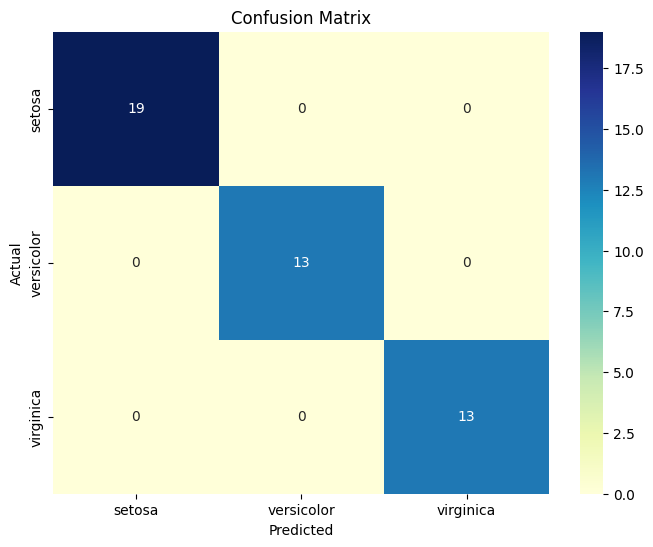

In [3]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Create and fit the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 5: Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 6: Generate the classification report
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)

# Step 7: Print the classification report
print("Classification Report:\n", class_report)

# Step 8: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()